In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

import seaborn as sns
sns.set(context="poster")

Following the approach of: http://cococubed.asu.edu/papers/kamm_2000.pdf

In [2]:
j = 3         # spherical
w = 0         # uniform background
gamma = 5./3  # adiabatic index

if not w < ( j*(3-gamma) + 2*(gamma-1)) / (gamma+1):
    print("Non-standard case -- equations below won't work")

V_0 = 2 / ( (j+2-w) * gamma )
V_2 = 4 / ( (j+2-w)*(gamma+1) )
# V = V_0
# V = .29

In [3]:
a = (j+2-w)*(gamma+1) / 4
b = (gamma+1) / (gamma-1)
c = (j+2-w) * gamma / 2
d = (j+2-w) * (gamma+1) / ( ((j+2-w)*(gamma+1)) - 2*(2+j*(gamma-1)))
e = (2 + j*(gamma-1)) / 2

x_1 = lambda V: a * V
x_2 = lambda V: b * (c*V - 1)
x_3 = lambda V: d * (1 - e*V)
x_4 = lambda V: b * (1 - (c/gamma)*V)

alpha_0 = 2 / (j+2-w)
alpha_2 = - (gamma-1) / ( 2*(gamma-1) + j - gamma*w )
alpha_1 = ( (j+2-w)*gamma / (2 + j*(gamma-1)) ) * ( ( 2*(j*(2-gamma) - w)/(gamma*(j+2-w))**2 ) - alpha_2 )
alpha_3 = (j-w) / ( 2*(gamma-1) + j - gamma*w )
alpha_4 = alpha_1 * (j+2-w)*(j-w) / ( j*(2-gamma) - w )
alpha_5 = ( w*(1+gamma) - 2*j ) / ( j*(2-gamma) - w )

In [4]:
print("a:", a )
print("b:", b )
print("c:", c )
print("d:", d )
print("e:", e )

print()
V_tmp = V_2
print("V  :",     V_tmp )
print("x_1:", x_1(V_tmp) )
print("x_2:", x_2(V_tmp) )
print("x_3:", x_3(V_tmp) )
print("x_4:", x_4(V_tmp) )

print()
print("alpha_0:", alpha_0 )
print("alpha_2:", alpha_2 )
print("alpha_1:", alpha_1 )
print("alpha_3:", alpha_3 )
print("alpha_4:", alpha_4 )
print("alpha_5:", alpha_5 )

a: 3.333333333333334
b: 4.0
c: 4.166666666666667
d: 2.4999999999999996
e: 2.0

V  : 0.29999999999999993
x_1: 1.0
x_2: 0.9999999999999991
x_3: 1.0000000000000002
x_4: 1.0000000000000009

alpha_0: 0.4
alpha_2: -0.15384615384615385
alpha_1: 0.38051282051282054
alpha_3: 0.6923076923076922
alpha_4: 5.707692307692309
alpha_5: -6.000000000000002


In [5]:
l = lambda V: x_1(V)**(-alpha_0) * x_2(V)**(-alpha_2) * x_3(V)**(-alpha_1)
f = lambda V: x_1(V) * l(V)
g = lambda V: x_1(V)**(alpha_0*w) * x_2(V)**(alpha_3 + alpha_2*w) * x_3(V)**(alpha_4 + alpha_1*w) * x_4(V)**(alpha_5)
h = lambda V: x_1(V)**(alpha_0*j) * x_3(V)**(alpha_4 + alpha_1*(w-2)) * x_4(V)**(1 + alpha_5)

In [6]:
V_tmp = V_2
print("V    = ",   V_tmp)
print("l(V) = ", l(V_tmp))
print("f(V) = ", f(V_tmp))
print("g(V) = ", g(V_tmp))
print("h(V) = ", h(V_tmp))

V    =  0.29999999999999993
l(V) =  0.9999999999999998
f(V) =  0.9999999999999998
g(V) =  0.9999999999999953
h(V) =  0.9999999999999967


In [7]:
dr_dV = lambda V: l(V) * ( (a)*(-alpha_0)/x_1(V) + (b*c)*(-alpha_2)/x_2(V) + (-d*e)*(-alpha_1)/x_3(V) )

dMomentum = lambda V: 4 * np.pi * l(V)**2 * dr_dV(V) *       g(V) * f(V)
dE_kin    = lambda V: 4 * np.pi * l(V)**2 * dr_dV(V) * 0.5 * g(V) * f(V)**2
dE_int    = lambda V: 4 * np.pi * l(V)**2 * dr_dV(V) * h(V) / (gamma-1)

momentum = quad(dMomentum, V_0, V_2)
E_kin = quad(dE_kin, V_0, V_2)
E_int = quad(dE_int, V_0, V_2)
E_tot = (E_kin[0] + E_int[0], np.sqrt(E_kin[1]**2 + E_int[1]**2) )

print("momentum = {0:e} +/- {1:e}".format(momentum[0], momentum[1]))
print("E_kin    = {0:e} +/- {1:e}".format(E_kin[0], E_kin[1]))
print("E_int    = {0:e} +/- {1:e}".format(E_int[0], E_int[1]))
print("E_tot    = {0:e} +/- {1:e}".format(E_tot[0], E_tot[1]))


momentum = 8.214181e-01 +/- 5.755892e-10
E_kin    = 3.590274e-01 +/- 7.410977e-11
E_int    = 2.702472e+00 +/- 1.132079e-09
E_tot    = 3.061500e+00 +/- 1.134502e-09


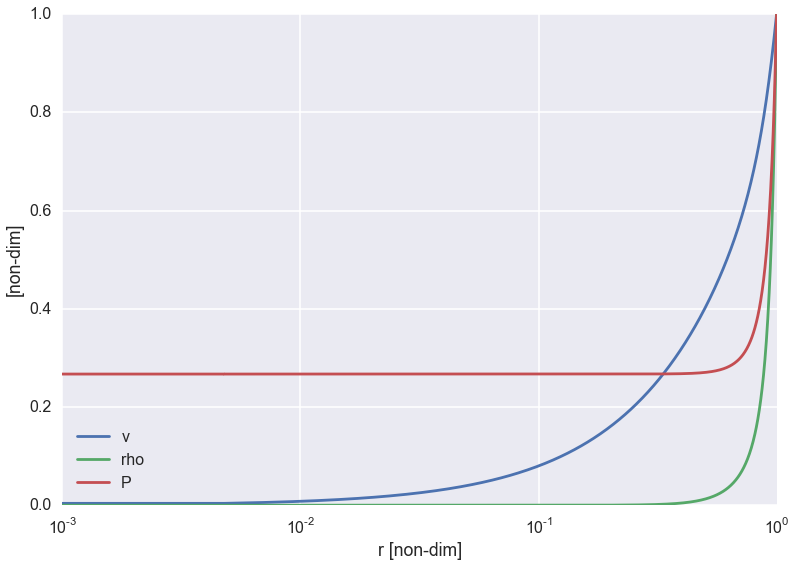

In [8]:
Vs = np.linspace(V_0, V_2, num=128)
Vs = V_0 + (V_2 - V_0)*np.linspace(0,1,num=500)**10

Vs = Vs[1:]
rs = l(Vs)
vs = f(Vs)
rhos = g(Vs)
ps = h(Vs)

plt.plot(rs, vs, label="v")
plt.plot(rs, rhos, label="rho")
plt.plot(rs, ps, label="P")
plt.legend(loc="best")
plt.xlabel("r [non-dim]")
plt.ylabel("[non-dim]")
plt.xscale("log")
# plt.yscale("log")